In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%load_ext cython

In [3]:
%%cython

cimport numpy as np
import numpy as np
import random
import math

cdef double  T = 1    # end time
cdef double dt = 1e-3 #time step

cdef int Steps = int(T/dt) # number of steps

cdef double Mean = 0.      # mean of W_t
cdef double Var  = dt      # Variance of W_t
cdef double x    = 1.      # current disposition
cdef double D    = 1.      # Diffusion Coefficient
cdef double mu   = 1.      # inverse friction coefficient == mobility of particle
cdef double k    = 1.      # force constant of harmonic potential

def step( double x ):
    dW = random.gauss(Mean,Var)
    dx = math.sqrt(2*D)*dW-mu*k*x*dt
    x += dx
    return x

def wiener_run( int Ntraj ):
    
    cdef np.ndarray Traj = np.zeros([ Ntraj, Steps], dtype=np.double)
    
    cdef int run = 0
    cdef int i = 0
    Traj[:,0]=x                 # set starting point
  
    for run in range(Ntraj):
        i = 0
        for i in range(Steps-1):
            Traj[run,i+1] = step(Traj[run,i])
    return Traj

### Exercise 11 a
$$\mathrm{d}x_t = \sqrt{2D} \mathrm{d}W_t$$

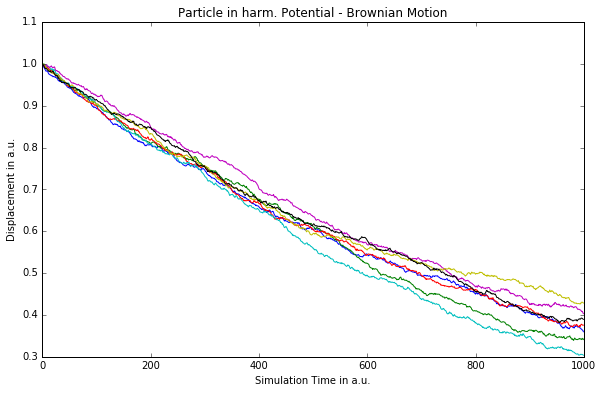

In [4]:
wiener = wiener_run(7)

fig = plt.figure(figsize=(1.618*6,6))
for row in wiener:
    plt.plot(row)
plt.xlabel('Simulation Time in a.u.')
plt.ylabel('Displacement in a.u.')
plt.title('Particle in harm. Potential - Brownian Motion')
plt.show()

In [5]:
## Exercise 11 b
 



In [6]:
wiener = wiener_run(1e5)
np.shape(wiener)


(100000, 1000)

In [7]:
hist = np.histogram(wiener[:,-1], bins=50)

In [8]:
D=1

In [9]:
def rho(x,t):
    return (1/np.sqrt(4*np.pi*D*t*1e-3))*np.exp(-x**2/(4*D*t*1e-3))

In [10]:
xarr = np.linspace(np.min(hist[1]), np.max(hist[1]))

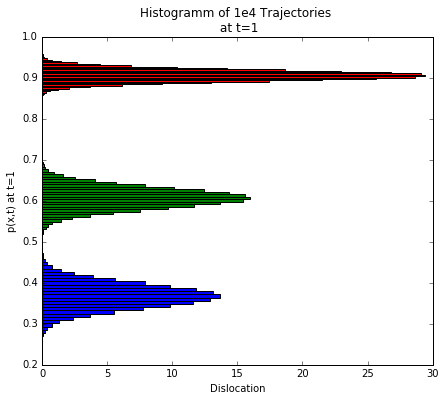

In [11]:
plt.figure(figsize=(7,20))
plt.subplot(311)
plt.hist(wiener[:, -1],normed=True, bins=35, orientation='horizontal')
plt.hist(wiener[:,499],normed=True, bins=35, orientation='horizontal')
plt.hist(wiener[:, 99],normed=True, bins=35, orientation='horizontal')
#plt.plot(xarr,rho(xarr,1), 'r-')
plt.xlabel("Dislocation")
plt.ylabel("p(x,t) at t=1")
plt.title("Histogramm of 1e4 Trajectories \n at t=1")


#plt.subplot(312)
#plt.hist(wiener[:,99],normed=True, bins=35)
#plt.plot(xarr,rho(xarr,1), 'r-')
#plt.xlabel("Dislocation")
#plt.ylabel("p(x,t) at t=1")
#plt.title("Histogramm of 1e4 Trajectories \n at t=0.1")

#plt.subplot(313)
#plt.hist(wiener[:,499],normed=True, bins=35)
#plt.plot(xarr,rho(xarr,1), 'r-')
#plt.xlabel("Dislocation")
#plt.ylabel("p(x,t) at t=1")
#plt.title("Histogramm of 1e4 Trajectories \n at t=0.5")
#plt.tight_layout()
plt.show()